Prediction Accuracy: 100.00%


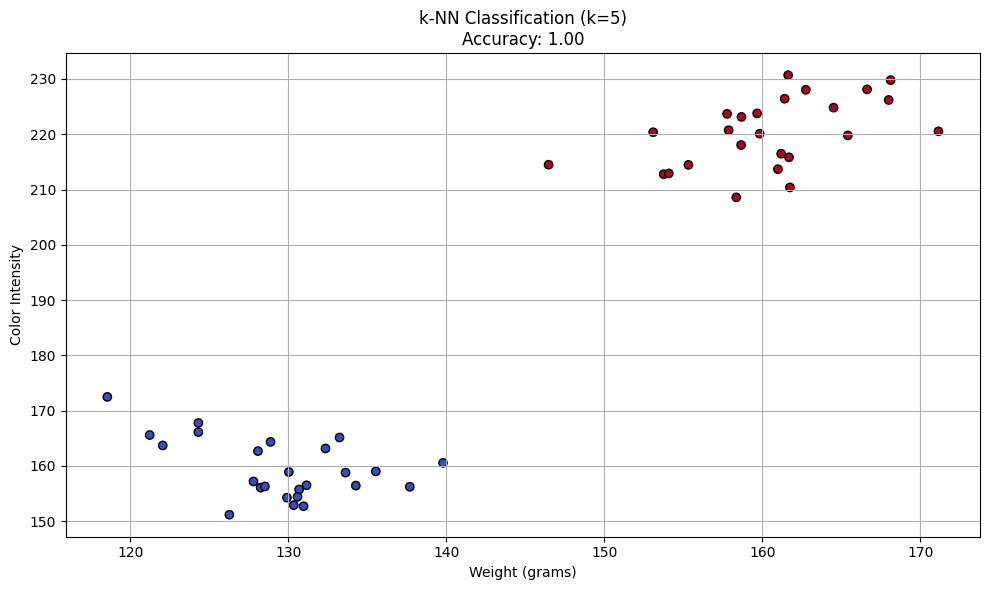

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -------------------------------
# 🍎 Step 1: Create Training Data
# -------------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Apples: typically heavier and redder
apple_mean = [160, 220]  # weight (g), color intensity
apple_cov = [[25, 10], [10, 30]]
apples = np.random.multivariate_normal(apple_mean, apple_cov, 100)
apple_labels = np.ones(100)  # class 1 = apple

# Oranges: lighter and less red
orange_mean = [130, 160]
orange_cov = [[25, -5], [-5, 20]]
oranges = np.random.multivariate_normal(orange_mean, orange_cov, 100)
orange_labels = np.zeros(100)  # class 0 = orange

# Combine into training dataset
X_train = np.vstack((apples, oranges))  # features: [weight, color]
y_train = np.concatenate((apple_labels, orange_labels))  # labels

# -------------------------------
# 🔍 Step 2: Train the k-NN Model
# -------------------------------

# Create k-NN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# "Training" for k-NN just means storing the data
knn.fit(X_train, y_train)

# -------------------------------
# 🧪 Step 3: Create Test Data
# -------------------------------

# Simulate new apples and oranges (25 each)
test_apples = np.random.multivariate_normal(apple_mean, apple_cov, 25)
test_oranges = np.random.multivariate_normal(orange_mean, orange_cov, 25)

# Combine into test set
X_test = np.vstack((test_apples, test_oranges))
y_test = np.array([1]*25 + [0]*25)

# -------------------------------
# 📈 Step 4: Predict and Evaluate
# -------------------------------

# Use the trained k-NN model to predict test labels
y_pred = knn.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

# -------------------------------
# 🎨 Step 5: Visualize the Results
# -------------------------------

plt.figure(figsize=(10, 6))
# Plot test points, colored by predicted label
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.xlabel("Weight (grams)")
plt.ylabel("Color Intensity")
plt.title(f"k-NN Classification (k={k})\nAccuracy: {accuracy:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()
